In [5]:
## Importing Essential Libraries for Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
## Loading the Uber Dataset
df= pd.read_csv(r'D:\My projects\UberDataset.csv')

In [7]:
## Displaying the First Few Rows of the Dataset

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
## Getting an Overview of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
## Counting Non-Null Values in Each Column
df.count()

START_DATE    1156
END_DATE      1155
CATEGORY      1155
START         1155
STOP          1155
MILES         1156
PURPOSE        653
dtype: int64

In [10]:
## Checking the Dimensions of the Dataset
df.shape

(1156, 7)

###Pre-Processing with missing data on Purpose Column


In [11]:
## Filling Missing Values in the 'PURPOSE' Column
df['PURPOSE'].fillna('not', inplace = True)

In [12]:
## Converting 'START_DATE' and 'END_DATE' Columns to Datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors= 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors= 'coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [14]:
## Extracting Date and Hour from 'START_DATE'
from datetime import datetime
df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

In [15]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [16]:
## Categorizing Time of Day into Morning, Afternoon, Evening, and Night
df['day-night'] = pd.cut(x=df ['time'],bins = [0,10,15,19,24], labels= ['Morning','Afternoon', 'Evening', 'Night'])

In [17]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [18]:
## Removing Rows with Missing Values
df.dropna(inplace = True)

In [19]:
df.shape

(413, 10)

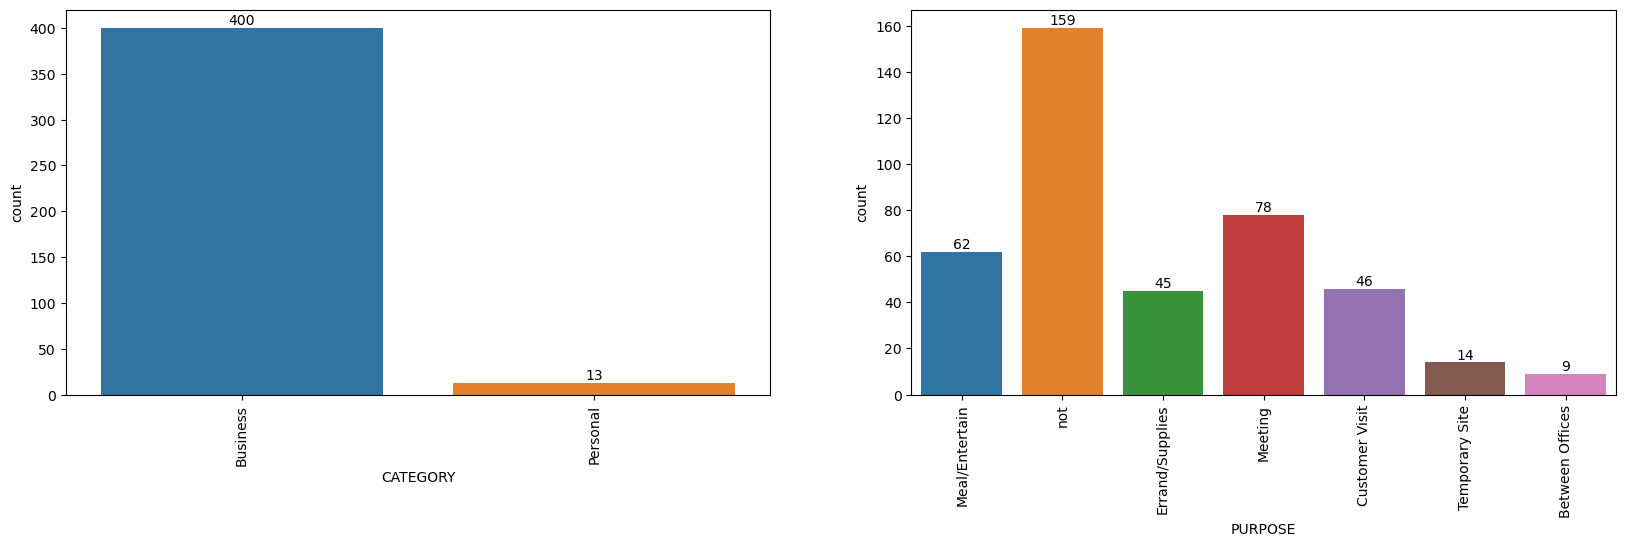

In [20]:
## Categorizing the Most Uber Ride Bookings and Their Purposes


###data visualization

plt.figure(figsize=(20, 5))

# First subplot for CATEGORY
ax1 = plt.subplot(1, 2, 1)  # Create subplot
sns.countplot(x='CATEGORY', data=df, ax=ax1)  # Pass ax1 explicitly
plt.xticks(rotation=90)

#values on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')

# Second subplot for PURPOSE
ax2 = plt.subplot(1, 2, 2)  # Create subplot
sns.countplot(x='PURPOSE', data=df, ax=ax2)  # Pass ax2 explicitly
plt.xticks(rotation=90)

# values on top of bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')

plt.show()


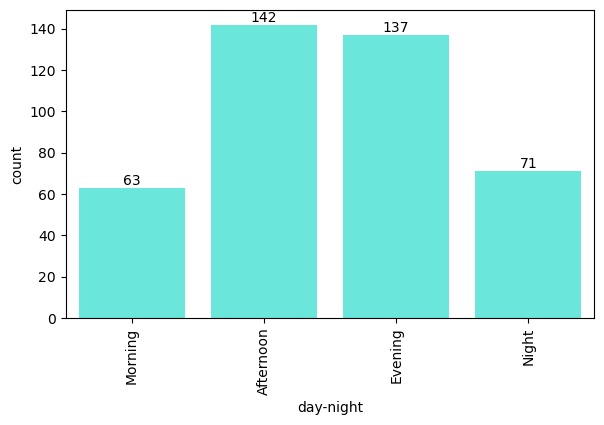

In [21]:
## Visualizing Uber Rides by Time of Day
plt.figure(figsize=(15, 4))

# First subplot for CATEGORY
ax1 = plt.subplot(1, 2, 1)  # Create subplot
sns.countplot(x='day-night', data=df, ax=ax1, color='#57FAEB')  # Pass ax1 explicitly
plt.xticks(rotation=90)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')
plt.show()

In [22]:
## Extracting Month from 'START_DATE' and Adding as a New Column
# Ensure START_DATE is in datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

# Extract month name and add it as a new column "month"
df['month'] = df['START_DATE'].dt.strftime('%b')
print(df.head())


           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE        date  time  day-night month  
0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0      Night   Jan  
1      Fort Pierce    5.0              not  2016-01-02   1.0    Morning   Jan  
2      Fort Pierce    4.8  Errand/Supplies  2016-01-02  20.0      Night   Jan  
3      Fort Pierce    4.7          Meeting  2016-01-05  17.0    Evening   Jan  
4  West Palm Beach   63.7   Customer Visit  2016-01-06  14.0  Afternoon   Jan  


In [23]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


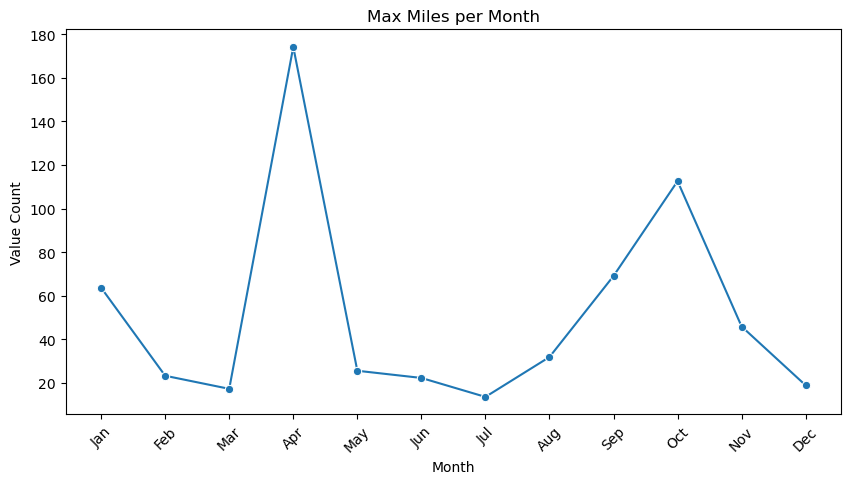

In [24]:

## Plotting Maximum Miles per Month

monthly_max = df.groupby('month', sort=False)['MILES'].max().reset_index()

plot_df = pd.DataFrame({
    "month": monthly_max['month'],
    "VALUE COUNT": monthly_max['MILES']
})

# Plot the line chart
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
p = sns.lineplot(data=plot_df, x="month", y="VALUE COUNT", marker="o")
p.set(xlabel="Month", ylabel="Value Count", title="Max Miles per Month")

plt.xticks(rotation=45)  
plt.show()


In [25]:

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [29]:
## Analyzing Uber Ride Bookings by Day of the Week
df['DAY'] = df.START_DATE.dt.weekday

day_label = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'}

df['DAY'] = df['DAY'].map(day_label)

In [30]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,month,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Thur
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,Morning,Jan,Fri
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Fri
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Mon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Tue


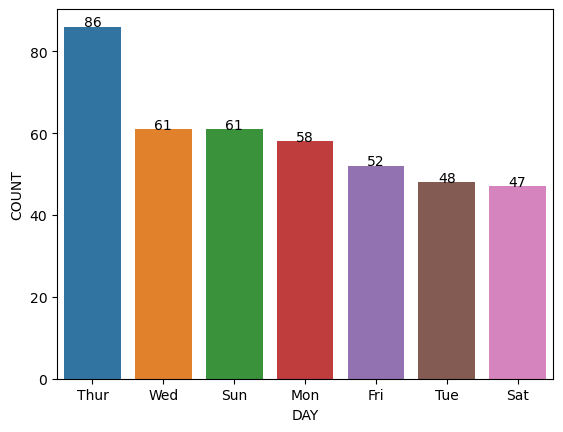

In [31]:

## Visualizing Uber Ride Bookings by Day of the Week
# data
day_label = df['DAY'].value_counts()

# Creating the bar plot
sns.barplot(x=day_label.index, y=day_label.values)
plt.xlabel('DAY')
plt.ylabel('COUNT')

# Adding the values on the bars
for i in range(len(day_label)):
    plt.text(i, day_label.values[i] + 0.1, str(day_label.values[i]), ha='center')

plt.show()

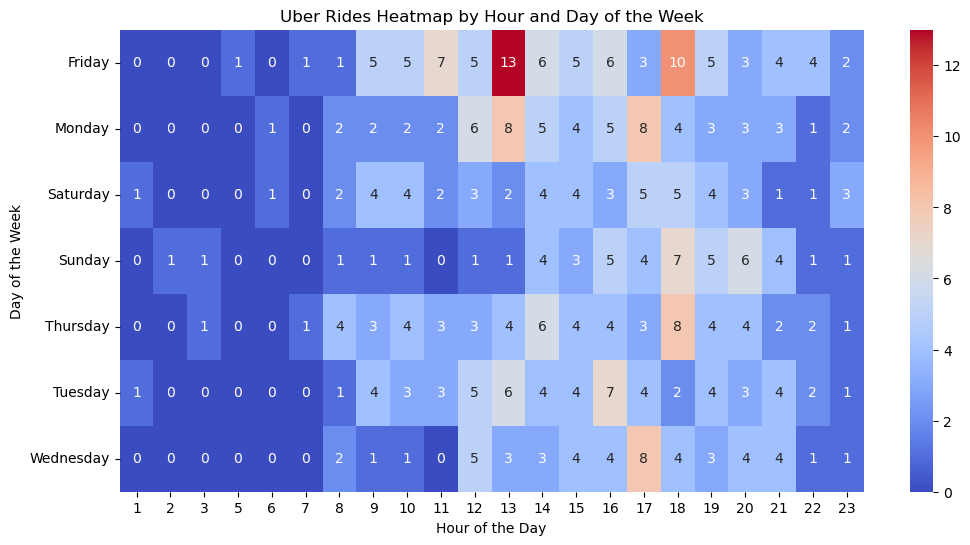

In [35]:
## Heatmap of Uber Ride Frequency by Hour and Day of the Week

df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

df['Hour'] = df['START_DATE'].dt.hour
df['DayOfWeek'] = df['START_DATE'].dt.day_name()

heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack()

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data.fillna(0).astype(int), cmap='coolwarm', annot=True, fmt='d')

plt.title('Uber Rides Heatmap by Hour and Day of the Week')
plt.ylabel('Day of the Week')
plt.xlabel('Hour of the Day')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   day-night   413 non-null    category      
 10  month       413 non-null    object        
 11  DAY         413 non-null    object        
 12  Hour        413 non-null    int32         
 13  DayOfWeek   413 non-null    object        
dtypes: category(1), datetime64[ns](2), float64(2), int32(1), object(8)
memory usage: 44.2+ KB


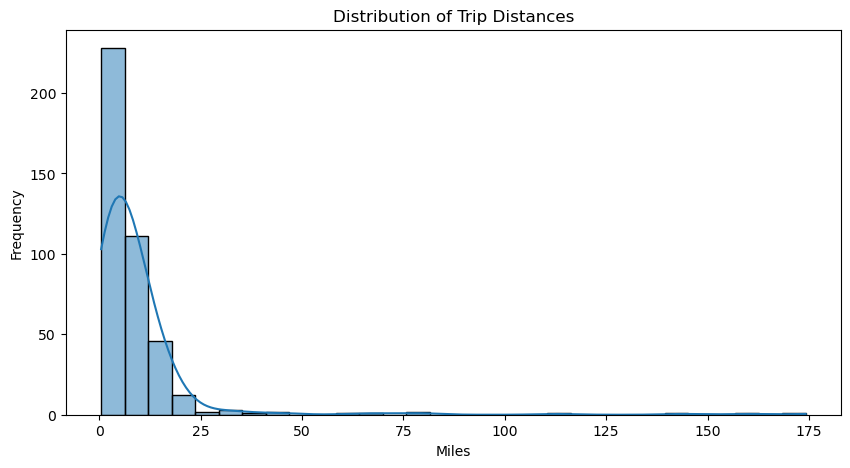

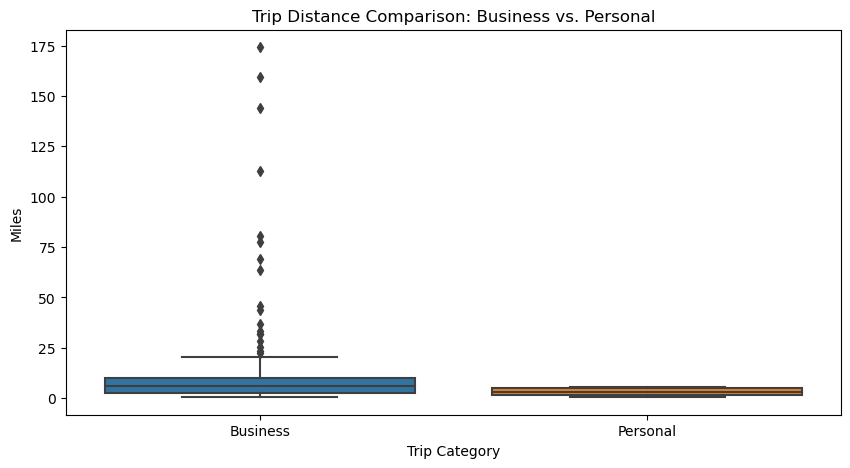

In [34]:
## Distribution of Trip Distances
plt.figure(figsize=(10, 5))
sns.histplot(df['MILES'], bins=30, kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

## Trip Distance Comparison: Business vs. Personal
plt.figure(figsize=(10, 5))
sns.boxplot(x='CATEGORY', y='MILES', data=df)
plt.title('Trip Distance Comparison: Business vs. Personal')
plt.xlabel('Trip Category')
plt.ylabel('Miles')
plt.show()